Create 3D (xyt) runoff file for spatiotemporal modification of runoff around Antarctica
Use IAF cycle 3 ... starting date 1/1/1990

see here:https://github.com/COSIMA/access-om2/wiki/Tutorials#Scaling-the-forcing-fields
and here: https://github.com/aekiss/notebooks/blob/master/make-jra55-scaling.ipynb

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath

import cmocean.cm as cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os


In [2]:
client = Client(n_workers=8)
client

distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/pas561/jnb/force_melt/dask-worker-space/worker-_fqptums', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/pas561/jnb/force_melt/dask-worker-space/worker-lvk9i517', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/pas561/jnb/force_melt/dask-worker-space/worker-bsqe8k7r', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/pas561/jnb/force_melt/dask-worker-space/worker-c279oqs0', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/pas561/jnb/force_melt/dask-worker-space/worker-mm5ji9hx', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/pas561/jnb/force_melt/dask-worker-space/worker-iai_v4sl', purging
distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/pas561/jnb/force_melt/dask-worker-space/work

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 200.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45167,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 200.00 GiB
Comm: tcp://127.0.0.1:34359,Total threads: 1
Dashboard: /proxy/34909/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:46579,


In [3]:
#add adeles offset to the runoff
#file='/g/data/v45/akm157/model_data/access-om_input/01deg_jra55v140_iaf_cycle3_freshwater/friver_offset_19900101-20190105.nc'
file='friver_offset_19790101-20190105.nc'
ds1=xr.open_dataset(file,engine='netcdf4')
offset=ds1.friver.load()
print(offset[1000:1010,80,0].values)
offset

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<xarray.DataArray 'friver' (time: 14615, lat: 720, lon: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 ... 2019-01-05T12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        computed as the river flux of liquid water into the ocean...
    long_name:      Water Flux into Sea Water from Rivers
    standard_name:  water_flux_into_sea_water_from_rivers
    units:          kg m-2 s-1

In [ ]:
start = '2000-01-01 00:00:00'
end = '2001-01-01 00:00:00'
lat_slice  = slice(-82,-40)

offset.sel(time=slice(start,end)).sel(yt_ocean=lat_slice).mean(dim='time').plot()

In [4]:
#friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19900101-19901231.nc
#friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19580101-20190105.cat.nc

#file='friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19900101-20190105.cat.nc'
file='friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19790101-20190105.cat.nc'
ds2=xr.open_dataset(file,engine='netcdf4')
cntrl=ds2.friver.load()
print(cntrl[1:10,80,0].values)
cntrl

[6.783546e-05 6.783546e-05 6.783546e-05 6.783546e-05 6.783546e-05
 6.783546e-05 6.783546e-05 6.783546e-05 6.783546e-05]


<xarray.DataArray 'friver' (time: 14615, lat: 720, lon: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 ... 2019-01-05T12:00:00
Attributes:
    standard_name:  water_flux_into_sea_water_from_rivers
    long_name:      Water Flux into Sea Water from Rivers
    comment:        computed as the river flux of liquid water into the ocean...
    units:          kg m-2 s-1
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello

In [5]:
outfile='friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19790101-20190105.cat.offset_added.nc'
#ds3=xr.open_dataset(outfile,engine='netcdf4')

In [6]:
mod=cntrl + offset
ds2['friver'].values=mod.values

In [8]:
ds2.attrs.update({'title': 'Added meltwater trend to ' + ds2.attrs['title']})
ds2.to_netcdf(outfile)

In [5]:
#ds.friver.mean(dim='time').plot()
#ds_mod.friver[:,80,0].values

In [9]:
start = '2000-01-01 00:00:00'
end = '2001-01-01 00:00:00'
lat_slice  = slice(-82,-40)



In [10]:
file='friver_offset_19790101-20190105.nc'
ds=xr.open_dataset(file,engine='netcdf4')
a=ds.friver.sel(time=slice(start,end)).sel(lat=lat_slice).sum()
a

<xarray.DataArray 'friver' ()>
array(5.519792, dtype=float32)

In [11]:
file='friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19790101-20190105.cat.nc'
ds=xr.open_dataset(file,engine='netcdf4')
b=ds.friver.sel(time=slice(start,end)).sel(lat=lat_slice).sum()
b

<xarray.DataArray 'friver' ()>
array(83.81921, dtype=float32)

In [12]:
file='friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19790101-20190105.cat.offset_added.nc'
ds=xr.open_dataset(file,engine='netcdf4')
c=ds.friver.sel(time=slice(start,end)).sel(lat=lat_slice).sum()
c

<xarray.DataArray 'friver' ()>
array(89.33893, dtype=float32)

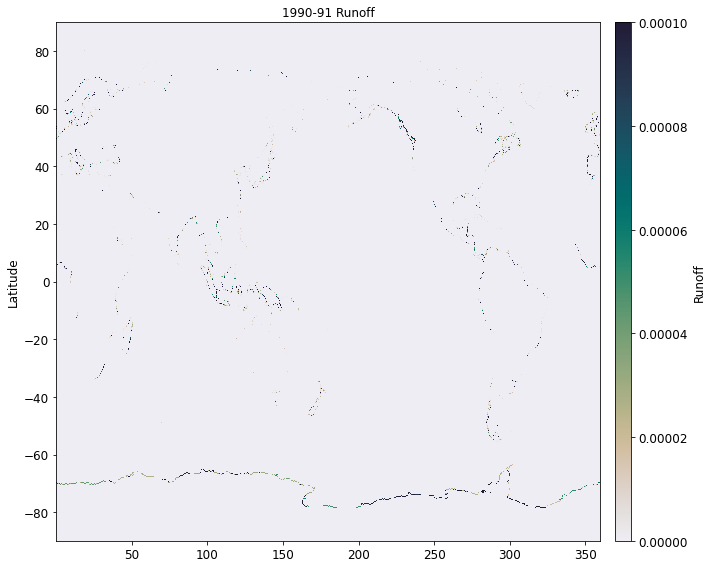

In [6]:
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
plt.gca().patch.set_color('.25')
plt.title('1990-91 Runoff',fontsize=fontsize)
pc=plt.pcolormesh(ds.lon,ds.lat,ds.friver[0,:,:],cmap=cmocean.rain,vmin=0,vmax=0.0001)
#plt.ylim(-67,-62)
#plt.xlim(-275,-245)
#plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
#plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Runoff',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

In [7]:
outfile = os.path.basename(file).replace('.nc', '_scale.nc')
print(outfile)

#ds = xr.open_dataset(file)
#ds

friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19580101-20190105.cat_scale.nc


In [8]:
#zero runoff outside of Antarctica
#set scaling factor to 10 where there is runoff
mod=ds.friver.where(ds.lat<-60,0)
mod=mod.where(mod<0.00000001,10)

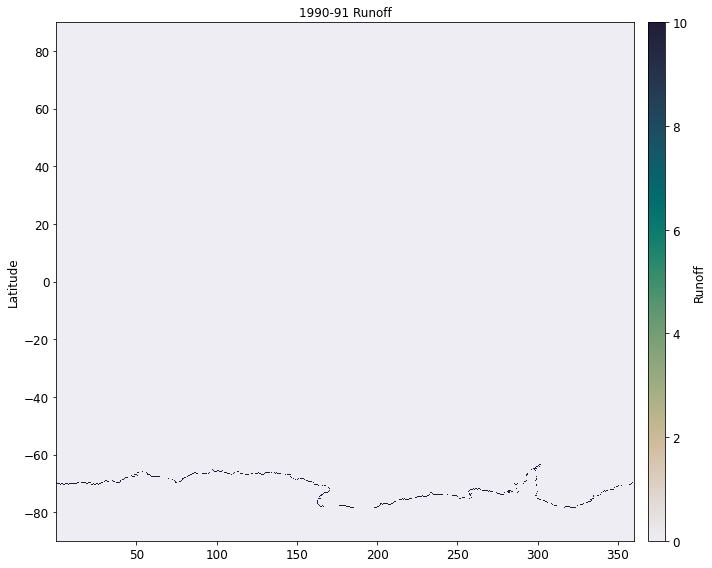

In [9]:
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
plt.gca().patch.set_color('.25')
plt.title('1990-91 Runoff',fontsize=fontsize)
pc=plt.pcolormesh(ds.lon,ds.lat,mod[10,:,:],cmap=cmocean.rain,vmin=0,vmax=10)
#plt.ylim(-67,-62)
#plt.xlim(-275,-245)
#plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
#plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Runoff',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

In [10]:
#set scaling factor of Antarctic runoff to 10
ds['friver'].values=mod.values

In [11]:
ds.friver[:,80,0].values

array([10., 10., 10., ..., 10., 10., 10.], dtype=float32)

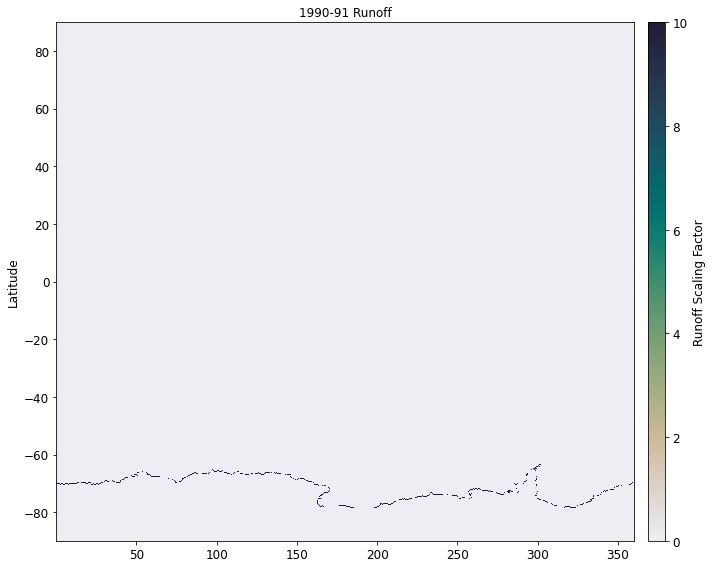

In [13]:
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
plt.gca().patch.set_color('.25')
plt.title('1990-91 Runoff',fontsize=fontsize)
pc=plt.pcolormesh(ds.lon,ds.lat,ds.friver[100,:,:],cmap=cmocean.rain,vmin=0,vmax=10)
#plt.ylim(-67,-62)
#plt.xlim(-275,-245)
#plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
#plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Runoff Scaling Factor',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

In [14]:
ds.attrs.update({'title': 'Scaling for ' + ds.attrs['title']})
ds.to_netcdf(outfile)

In [15]:
print(outfile)
ds_mod=xr.open_dataset(outfile)
ds_mod

friver_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr_19580101-20190105.cat_scale.nc


<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 720, lon: 1440, time: 22285)
Coordinates:
  * time       (time) datetime64[ns] 1958-01-01T12:00:00 ... 2019-01-05T12:00:00
  * lat        (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon        (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    friver     (time, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:         CF-1.7 CMIP-6.2
    activity_id:         input4MIPs
    cell_measures:       area: areacello
    comment:             Based on JRA-55 reanalysis (1958-01 to 2019-01)
    contact:             Hiroyuki Tsujino (htsujino@mri-jma.go.jp)
    creation_date:       2019-03-08T11:49:26Z
    ...                  ...
    title:               Scaling for MRI JRA55-do 1.4.0 dataset prepared for ...
    tracking_id:         hdl:21.14100/fd7d7d42-7c52-4b95-8dcc-cf468e42aa23
    variable_id:         friver
    license:             OMIP boundary condition data produced by MRI is lice...
    cmor_version:        3.4.0
    NCO:                 netCDF Operators version 4.9.9 (Homepage = http://nc...

In [16]:
ds_mod.friver[:,80,0].values

array([10., 10., 10., ..., 10., 10., 10.], dtype=float32)

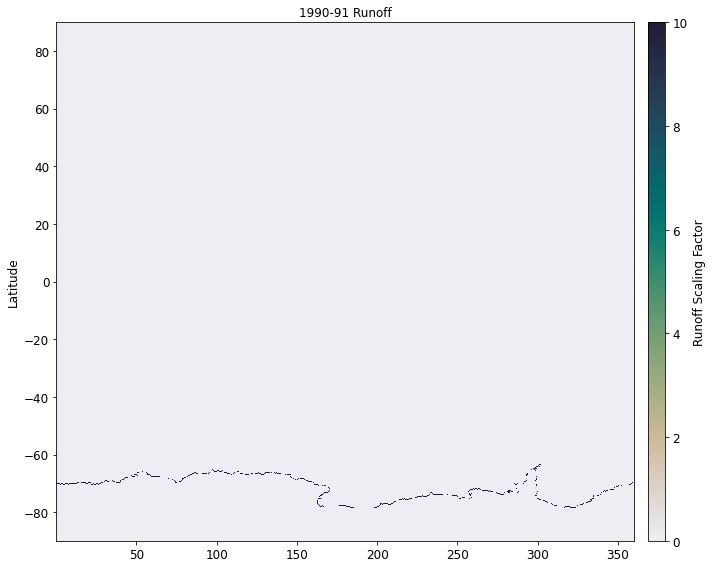

In [17]:
fontsize=12

plt.figure(figsize=(10,8))

plt.subplot(1,1,1)
plt.gca().patch.set_color('.25')
plt.title('1990-91 Runoff',fontsize=fontsize)
pc=plt.pcolormesh(ds_mod.lon,ds_mod.lat,ds_mod.friver[1000,:,:],cmap=cmocean.rain,vmin=0,vmax=10)
#plt.ylim(-67,-62)
#plt.xlim(-275,-245)
#plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
#plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Runoff Scaling Factor',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()